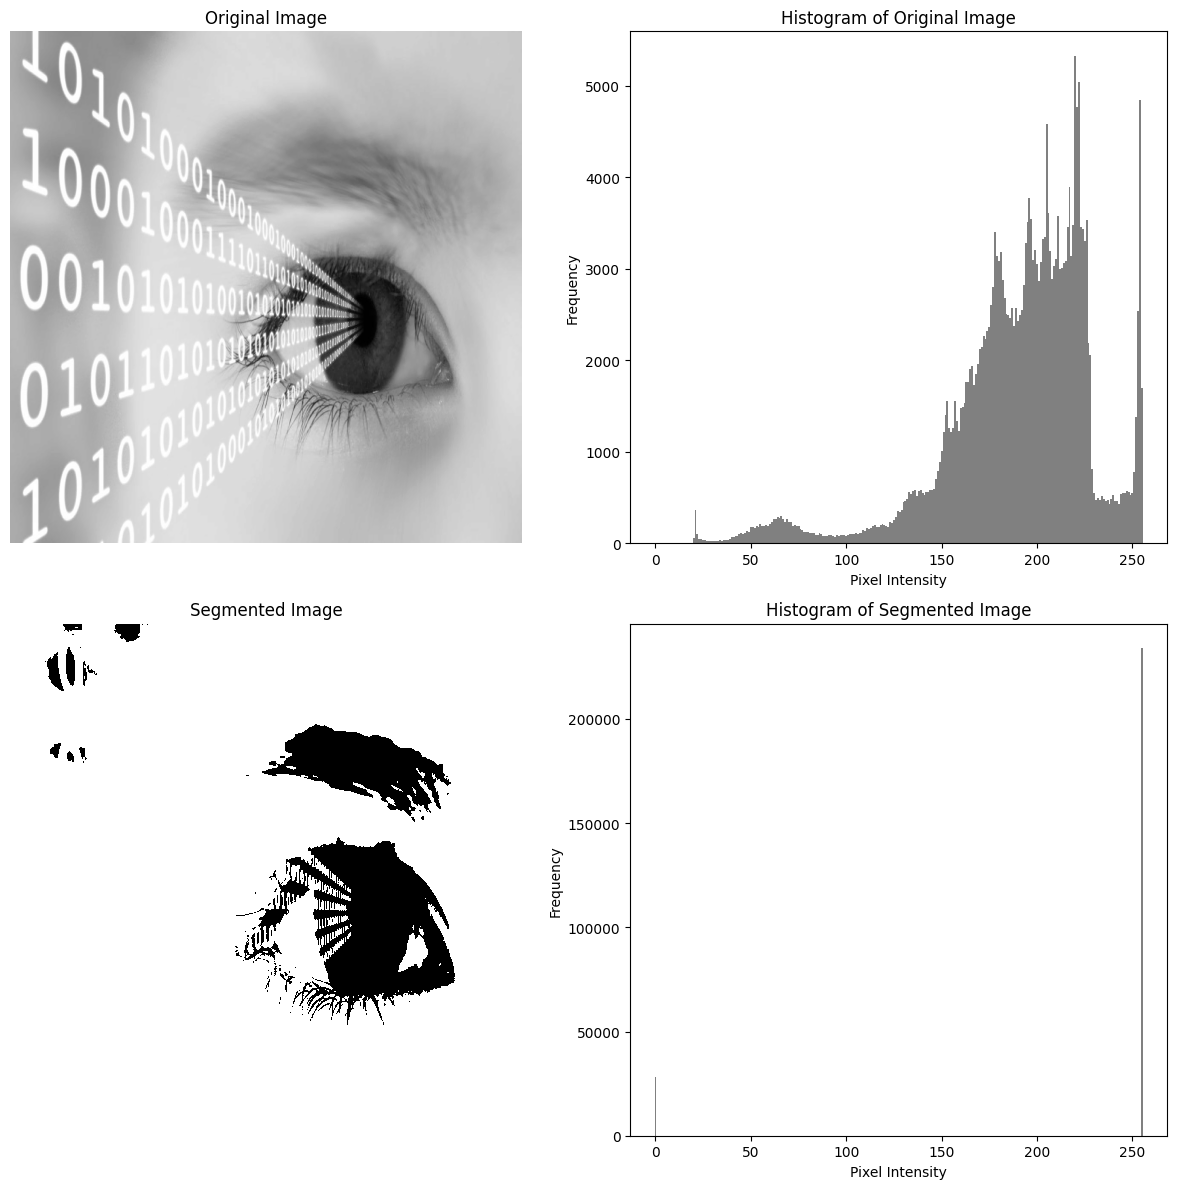

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def generate_histogram(image):
  
    histogram = np.zeros(256)# Creates an array of size 256 to count pixel intensities (0–255).
    height, width = image.shape

    for i in range(height):
        for j in range(width):
            histogram[image[i, j]] += 1
    return histogram

def plot_histograms_and_images(original_image, segmented_image):
    
  
    # Generate histograms
    original_histogram = generate_histogram(original_image)
    segmented_histogram = generate_histogram(segmented_image)

    # Plot original image and its histogram
    plt.figure(figsize=(12, 12))

    plt.subplot(2, 2, 1)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.bar(range(256), original_histogram, color='gray', width=1)
    plt.title('Histogram of Original Image')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    # Plot segmented image and its histogram
    plt.subplot(2, 2, 3)
    plt.imshow(segmented_image, cmap='gray')
    plt.title('Segmented Image')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.bar(range(256), segmented_histogram, color='gray', width=1)
    plt.title('Histogram of Segmented Image')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.tight_layout()#Ensures the subplots are neatly arranged.
    plt.show()

def plot_histogram_and_segment(image, threshold):
  
    # Apply threshold segmentation
    segmented_image = np.where(image > threshold, 255, 0).astype(np.uint8)#Pixels with intensities above the threshold are set to 255 (white), others to 0 (black).

    return segmented_image

# Load a 512x512 grayscale image
image_path = "img.jpg"  # Replace with your image path
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if original_image is None:
    raise ValueError("Could not load the image. Please check the file path.")

# Resize image if not 512x512
if original_image.shape != (512, 512):
    original_image = cv2.resize(original_image, (512, 512), interpolation=cv2.INTER_AREA)

# Choose a threshold value (can be determined from the histogram)
threshold_value = 150 # Example value, adjust as needed based on histogram observation

# Perform segmentation
segmented_image = plot_histogram_and_segment(original_image, threshold_value)

# Plot original and segmented images with histograms
plot_histograms_and_images(original_image, segmented_image)
